In [38]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import operator
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

df = pd.read_csv("../dataset/train_processed.csv")
df = df.drop(["Payment_Behaviour"], axis=1)

good = df[df["Credit_Score"] == "Good"]
standard = df[df["Credit_Score"] == "Standard"]
poor = df[df["Credit_Score"] == "Poor"]
standard = standard.sample(frac=0.3, random_state=20)
poor = poor.sample(frac=0.5, random_state=20)

df = pd.concat([good, standard, poor])

X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

print(f"Number of occurrences:\nGood: {good.shape[0]}\nStandard: {standard.shape[0]}\nPoor: {poor.shape[0]}")
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_rescaled, columns=X.columns)
categories=[["Good", "Standard", "Poor"]]
encoder = OneHotEncoder(categories=categories, sparse=False)
y = encoder.fit_transform(y.values.reshape(-1, 1))

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.2)
mlp = MLPClassifier(solver="sgd", alpha=0.00045, activation="relu", learning_rate="adaptive", learning_rate_init=0.1, batch_size=128, hidden_layer_sizes=(150, 100, 65, 43), max_iter=10000, random_state=21)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)
print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Number of occurrences:
Good: 7073
Standard: 7187
Poor: 6990


/Users/nhannguyen/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy :  0.5938823529411764
Mean Square Error :  0.251921568627451
Confusion Matrix for each label : 
[[[2375  461]
  [ 495  919]]

 [[2155  655]
  [ 699  741]]

 [[2400  454]
  [ 448  948]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      1414
           1       0.53      0.51      0.52      1440
           2       0.68      0.68      0.68      1396

   micro avg       0.62      0.61      0.62      4250
   macro avg       0.62      0.61      0.62      4250
weighted avg       0.62      0.61      0.62      4250
 samples avg       0.60      0.61      0.61      4250



/Users/nhannguyen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


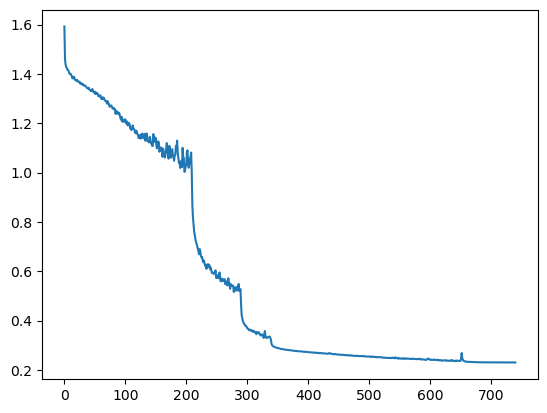

In [33]:
loss_values = mlp.loss_curve_
plt.plot(loss_values)